In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import statsmodels.api as sm

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pdf 확률밀도함수(probability density function)  
cdf 누적분포함수(cumulative distribution function)  
rvs 랜덤 표본 생성(random variable sampling)  

## 이항검정

In [3]:
scipy.stats.binom_test(3, n=15, p=0.1, alternative='greater')

0.18406106910639114

## 카이제곱 검정

In [4]:
scipy.stats.chisquare([1,2])
scipy.stats.chi2_contingency([1,2]) # 독립검정  

Power_divergenceResult(statistic=0.3333333333333333, pvalue=0.5637028616507731)

(0.0, 1.0, 0, array([1., 2.]))

## 단일표본 t-검정
* ttest_1samp(표본 데이터 배열, 귀무가설 기댓값)

In [5]:
rvs = scipy.stats.norm.rvs(loc=5, scale=10, size=(50,2))
scipy.stats.ttest_1samp(rvs, popmean=0)

Ttest_1sampResult(statistic=array([2.77337685, 3.71941097]), pvalue=array([0.00782604, 0.00051404]))

## 독립표본 t-검정(등분산검정)
* ttest_ind(1표본 집합, 2표본 집합, equal_var= TRUE두 표본 분산 동일)

In [6]:
rvs1 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
scipy.stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=0.3518395144985487, pvalue=0.7250328969523328)

## 대응표본 t-검정
* ttest_rel(1표본 집합, 2표본 집합)

In [7]:
rvs1 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
scipy.stats.ttest_rel(rvs1,rvs2)

Ttest_relResult(statistic=-0.4959039169586358, pvalue=0.6201805418671866)

## 등분산검정
* bartlett, fligner, levene 검정 

In [8]:
x1 = scipy.stats.norm(0, 1).rvs(100)
x2 = scipy.stats.norm(0, 1.2).rvs(200)
scipy.stats.bartlett(x1, x2)
scipy.stats.fligner(x1, x2)
scipy.stats.levene(x1, x2)

BartlettResult(statistic=2.5838366849390826, pvalue=0.10795969984499341)

FlignerResult(statistic=2.802237802670991, pvalue=0.0941328416164771)

LeveneResult(statistic=2.843150365150036, pvalue=0.09281076141119439)

## 정규성 검정
* 콜모고로프-스미르노프 검정 ks_2samp  
* 샤피로-월크 shapiro  

In [9]:
scipy.stats.ks_2samp(x1, x2)
scipy.stats.shapiro(x1)  

Ks_2sampResult(statistic=0.075, pvalue=0.8398708501969149)

(0.9921408295631409, 0.8313326239585876)

## 잔차 정규성 검정 
### Q-Q plot
$ e = y - \hat w ^ T x $ ~ 정규분포
* probplot(result.resid, plot=plt)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-2.65960874, -1.04009673, -0.74145536, -0.489631  , -0.25848776,
          0.17120179,  0.27494999,  0.78192963,  0.82311418,  2.49767387])),
 (1.4371314454488533, -0.06404101406878325, 0.9707246580734424))

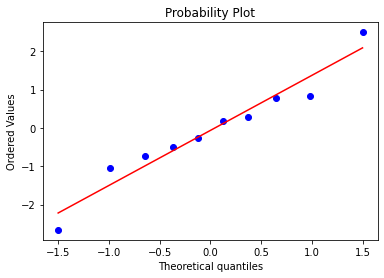

In [10]:
x1 = scipy.stats.norm(0, 1).rvs(10)
scipy.stats.probplot(x1, plot=plt)
plt.show()

In [11]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1
    
params_w1.mean(), params_w1.std(), params_w0.mean(), params_w0.std()    
print(result.summary())

(42.83799213484761,
 1.9055971599782147,
 -1.6319756743059275,
 2.1878498770263124)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.21e-36
Time:                        15:17:08   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

#### 회귀분석 F-검정(전체 계수 의미 있는가)
$ H_0 : w_0 = w_1 = ... = w_{K-1} = 0  $

F-statistic: 400.3 Prob (F-statistic): 2.21e-36 

#### 오차 독립성(Durbin-Watson) 
* 독립 X 선형회귀 모형이 아닌 시계열 모형  
  * 오차가 독립인지 검정하는 방법: 잔차를 시계열로 가정 자기상관계수  
    * 시차(lag)가 0인 경우를 제외하고는 자기상관계수 ρl 이 0

In [12]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [13]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


## 단일 계수 t-검정
$ H_0:w_1=40 $X1에 대한 계수값 $w_1$ 40 해도 되는지 테스트

In [14]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


## 쿡의 거리

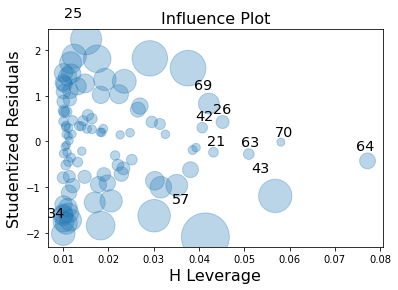

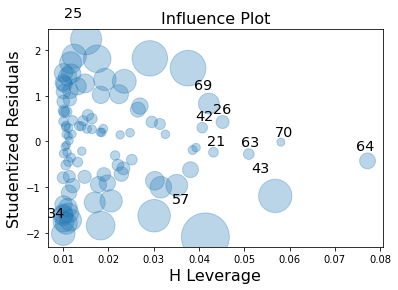

In [17]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show() # Cook’s distance 버블 크기 표시

In [24]:
influence = result.get_influence() # 영향도 정보 객체
hat = influence.hat_matrix_diag # 레버리지 벡터의 값
hat.sum()
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]
y[idx]

2.0000000000000004

array([  98.91162315,   69.44160984, -119.0521092 ,  -37.12382346])

## 분산 분석(ANOVA)

In [28]:
X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

In [29]:
print("TSS = ", result.uncentered_tss) # (total sum of square): 종속 변수 y의 분산
print("ESS = ", result.mse_model) # (explained sum of squares) 회귀 분석에 의해 예측한 값 y^의 분산
print("RSS = ", result.ssr) # RSS(residual sum of squares): 잔차 e의 분산
# TSS = ESS + RSS
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS =  102754.33755137534
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922585


In [30]:
sm.stats.anova_lm(result)
# sm.stats.anova_lm(model_reduced.fit(), model_full.fit())
# typ=2 하나 하나의 변수를 뺀 축소 모형에서의 F 검정값을 한꺼번에 계산

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


C:\Users\okso6\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


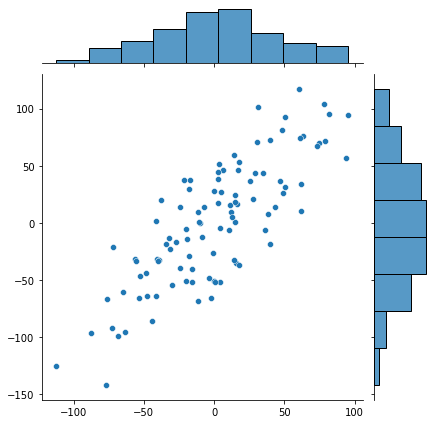

In [34]:
sns.jointplot(result.fittedvalues, y)
plt.show()

## 다중공산성 없애는 VIF(Variance Inflation Factor)
* 변수 선택법으로 의존적인 변수 삭제
* PCA(principal component analysis) 방법으로 의존적인 성분 삭제
* 정규화(regularized) 방법 사용

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,1.003521,const
1,1.000000,X


참고 출처: https://datascienceschool.net/